In [5]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
X_train = pd.read_csv("../train-test-split/X_train.csv")
X_test  = pd.read_csv("../train-test-split/X_test.csv")
y_train = pd.read_csv("../train-test-split/y_train.csv")
y_test  = pd.read_csv("../train-test-split/y_test.csv")


In [7]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [8]:
# Remove any remaining NaN just in case
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [9]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [10]:
y_pred = model.predict(X_test)


In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 1.4396522190656569
R² Score: 0.22563753222187877


In [12]:
import joblib
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(model, "../models/movie_rating_model.pkl")

print("✅ Model saved successfully")


✅ Model saved successfully


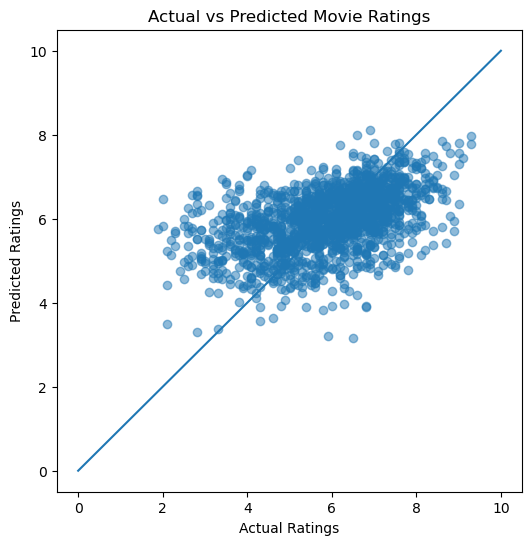

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.plot([0,10], [0,10])
plt.savefig("../results/plots/actual_vs_predicted.png")
plt.show()


In [15]:
with open("../results/metrics.txt", "w") as f:
    f.write(f"MSE: {mse}\n")
    f.write(f"R2 Score: {r2}\n")

